In [1]:
import sys
!{sys.executable} -m pip install --upgrade google-cloud-bigquery

    100% |████████████████████████████████| 92kB 4.7MB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 8.9MB/s ta 0:00:011
Requirement not upgraded as not directly required: googleapis-common-protos<2.0dev,>=1.5.3 in /opt/conda/lib/python3.6/site-packages (from google-api-core<2.0.0dev,>=1.0.0->google-cloud-bigquery) (1.5.3)
Requirement not upgraded as not directly required: six>=1.10.0 in /opt/conda/lib/python3.6/site-packages (from google-api-core<2.0.0dev,>=1.0.0->google-cloud-bigquery) (1.11.0)
Requirement not upgraded as not directly required: requests<3.0.0dev,>=2.18.0 in /opt/conda/lib/python3.6/site-packages (from google-api-core<2.0.0dev,>=1.0.0->google-cloud-bigquery) (2.18.4)
Requirement not upgraded as not directly required: pytz in /opt/conda/lib/python3.6/site-packages (from google-api-core<2.0.0dev,>=1.0.0->google-cloud-bigquery) (2018.5)
    100% |████████████████████████████████| 71kB 7.5MB/s ta 0:00:011
Requirement not upgraded as not directly required:

In [11]:
import sys
!{sys.executable} -m pip install cython pandas-gbq

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from google.cloud import bigquery
client = bigquery.Client()

In [5]:
query_job = client.query("""
	WITH
	  table1 AS (
	  SELECT
	    project_short_name,
	    case_barcode,
	    IF (gender = 'FEMALE',
	      1,
	      0) AS F,
	    IF (gender = 'MALE',
	      1,
	      0) AS M
	  FROM
	    `isb-cgc.TCGA_bioclin_v0.Clinical`
	  GROUP BY
	    project_short_name,
	    case_barcode,
	    gender)
	    -- 
	    --
	SELECT
	  project_short_name,
	  SUM(M) AS M_count,
	  SUM(F) AS F_count
	FROM
	  table1
	GROUP BY
	  project_short_name
	""")

results = query_job.result()

In [6]:
for row in results:
    print("{} : {} : {}".format(row.project_short_name, row.F_count, row.M_count))

TCGA-UCEC : 548 : 0
TCGA-CESC : 307 : 0
TCGA-OV : 587 : 0
TCGA-UCS : 57 : 0
TCGA-BRCA : 1085 : 12
TCGA-CHOL : 25 : 20
TCGA-DLBC : 26 : 22
TCGA-STAD : 158 : 285
TCGA-LGG : 230 : 285
TCGA-ACC : 60 : 32
TCGA-SKCM : 180 : 290
TCGA-UVM : 35 : 45
TCGA-BLCA : 108 : 304
TCGA-KICH : 51 : 62
TCGA-THYM : 60 : 64
TCGA-MESO : 16 : 71
TCGA-PCPG : 101 : 78
TCGA-KIRC : 191 : 346
TCGA-READ : 78 : 92
TCGA-PAAD : 83 : 102
TCGA-LAML : 91 : 109
TCGA-GBM : 230 : 366
TCGA-LUSC : 131 : 373
TCGA-SARC : 142 : 119
TCGA-HNSC : 142 : 386
TCGA-TGCT : 0 : 134
TCGA-THCA : 371 : 136
TCGA-ESCA : 27 : 158
TCGA-KIRP : 77 : 214
TCGA-LUAD : 280 : 242
TCGA-COAD : 216 : 243
TCGA-PRAD : 0 : 500
TCGA-LIHC : 122 : 255


In [52]:
import pandas


In [14]:
projectid = "isb-cgc-02-0001"
query = """
	WITH
	  table1 AS (
	  SELECT
	    project_short_name,
	    case_barcode,
	    IF (gender = 'FEMALE',
	      1,
	      0) AS F,
	    IF (gender = 'MALE',
	      1,
	      0) AS M
	  FROM
	    `isb-cgc.TCGA_bioclin_v0.Clinical`
	  GROUP BY
	    project_short_name,
	    case_barcode,
	    gender)
	    -- 
	    --
	SELECT
	  project_short_name,
	  SUM(M) AS M_count,
	  SUM(F) AS F_count
	FROM
	  table1
	GROUP BY
	  project_short_name
	"""
data_frame = pandas.read_gbq(query, project_id=projectid, dialect='standard')

In [15]:

data_frame.shape

(33, 3)

In [16]:
data_frame

,project_short_name,M_count,F_count
0,TCGA-UCEC,0,548
1,TCGA-CESC,0,307
2,TCGA-OV,0,587
3,TCGA-UCS,0,57
4,TCGA-BRCA,12,1085
5,TCGA-CHOL,20,25
6,TCGA-DLBC,22,26
7,TCGA-STAD,285,158
8,TCGA-LGG,285,230
9,TCGA-ACC,32,60


<Figure size 432x288 with 0 Axes>

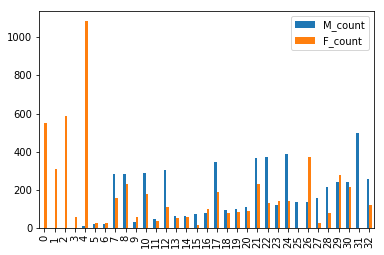

In [19]:
import matplotlib.pyplot as plt
plt.figure();
df2 = pandas.DataFrame(data_frame, columns=['M_count','F_count'])
df2.plot.bar();

In [1]:
import sys
!{sys.executable} -m pip install pyspark findspark

    100% |████████████████████████████████| 211.9MB 174kB/s eta 0:00:01   36% |███████████▋                    | 76.9MB 73.9MB/s eta 0:00:02
    100% |████████████████████████████████| 204kB 19.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyspark ... done
  Stored in directory: /root/.cache/pip/wheels/be/7d/34/cd3cfbc75d8b6b6ae0658e5425348560b86d187fe3e53832cc
Successfully built pyspark
mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import findspark
findspark.init()


In [4]:
from datetime import datetime
from pyspark.context import SparkContext
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression
from pyspark.sql.session import SparkSession

In [34]:
def vector_from_inputs(r):
  return (float(r["label"]), Vectors.dense(float(r["EFGR"]),
                                    float(r["TP53"]),
                                    float(r["NOTCH1"]),
                                    float(r["GATA3"])))

In [6]:
# Use Cloud Dataprocs automatically propagated configurations to get
# the Cloud Storage bucket and Google Cloud Platform project for this
# cluster.
sc = SparkContext()
spark = SparkSession(sc)


In [7]:
bucket = spark._jsc.hadoopConfiguration().get("fs.gs.system.bucket")
project = spark._jsc.hadoopConfiguration().get("fs.gs.project.id")

print(bucket)
print(project)

dataproc-6b064c10-086c-44db-b3b5-f14e410e0c13-us
isb-cgc-02-0001


In [28]:
# Set an input directory for reading data from Bigquery.
todays_date = datetime.strftime(datetime.today(), "%Y-%m-%d-%H-%M-%S")
input_directory = "gs://qotm_oct_2018" + todays_date

In [35]:
# Set the configuration for importing data from BigQuery.
# Specifically, make sure to set the project ID and bucket for Cloud Dataproc,
# and the project ID, dataset, and table names for BigQuery.

conf = {
    # Input Parameters
    "mapred.bq.project.id": project,
    "mapred.bq.gcs.bucket": bucket,
    "mapred.bq.temp.gcs.path": input_directory,
    "mapred.bq.input.project.id": project,
    "mapred.bq.input.dataset.id": "spark_job",
    "mapred.bq.input.table.id": "tcga_spark"
}
print(conf)


{'mapred.bq.project.id': 'isb-cgc-02-0001', 'mapred.bq.gcs.bucket': 'dataproc-6b064c10-086c-44db-b3b5-f14e410e0c13-us', 'mapred.bq.temp.gcs.path': 'gs://qotm_oct_20182018-10-29-23-47-53', 'mapred.bq.input.project.id': 'isb-cgc-02-0001', 'mapred.bq.input.dataset.id': 'spark_job', 'mapred.bq.input.table.id': 'tcga_spark'}


In [36]:
# Read the data from BigQuery into Spark as an RDD.
table_data = spark.sparkContext.newAPIHadoopRDD(
    "com.google.cloud.hadoop.io.bigquery.JsonTextBigQueryInputFormat",
    "org.apache.hadoop.io.LongWritable",
    "com.google.gson.JsonObject",
    conf=conf)


# Extract the JSON strings from the RDD.
table_json = table_data.map(lambda x: x[1])

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.newAPIHadoopRDD.
: java.io.IOException: Conflict occurred creating export directory. Path gs://qotm_oct_20182018-10-29-23-47-53 already exists
	at com.google.cloud.hadoop.io.bigquery.AbstractExportToCloudStorage.prepare(AbstractExportToCloudStorage.java:68)
	at com.google.cloud.hadoop.io.bigquery.AbstractBigQueryInputFormat.getSplits(AbstractBigQueryInputFormat.java:136)
	at org.apache.spark.rdd.NewHadoopRDD.getPartitions(NewHadoopRDD.scala:125)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:252)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:250)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:250)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:252)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:250)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:250)
	at org.apache.spark.rdd.RDD$$anonfun$take$1.apply(RDD.scala:1333)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.take(RDD.scala:1327)
	at org.apache.spark.api.python.SerDeUtil$.pairRDDToPython(SerDeUtil.scala:203)
	at org.apache.spark.api.python.PythonRDD$.newAPIHadoopRDD(PythonRDD.scala:596)
	at org.apache.spark.api.python.PythonRDD.newAPIHadoopRDD(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)


In [37]:
# Load the JSON strings as a Spark Dataframe.
tcga_data = spark.read.json(table_json)

# Create a view so that Spark SQL queries can be run against the data.
tcga_data.createOrReplaceTempView("tcga_view")

In [38]:
# As a precaution, run a query in Spark SQL to ensure no NULL values exist.
sql_query = """
SELECT *
from tcga_view
where label is not null
and EFGR is not null
and TP53 is not null
and GATA3 is not null
and NOTCH1 is not null
"""
clean_data = spark.sql(sql_query)

In [39]:
# Create an input DataFrame for Spark ML using the above function.
training_data = clean_data.rdd.map(vector_from_inputs).toDF(["label",
                                                             "features"])
training_data.cache()

DataFrame[label: double, features: vector]

In [45]:

# Construct a new LinearRegression object and fit the training data.
# https://spark.apache.org/docs/latest/ml-classification-regression.html#binomial-logistic-regression
lr = LogisticRegression(maxIter=5, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(training_data)
# Print the model summary.
print("Coefficients:" + str(model.coefficients))
print("Intercept:" + str(model.intercept))



Coefficients:[50.29267918772197,0.0,0.16224745918590844,-0.31689142394240727]
Intercept:-0.9932429393509908


In [46]:
# getting the model performance metrics 
trainingSummary = lrModel.summary

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)


objectiveHistory:
0.5835274717778136
0.5801510529881112
0.5608210301759466
0.5600787243659968
0.559400795893893
0.559111570022316
+--------------------+-------------------+
|                 FPR|                TPR|
+--------------------+-------------------+
|                 0.0|                0.0|
|0.001646090534979...|0.03111111111111111|
|0.002469135802469...|0.06444444444444444|
|0.003292181069958...|0.09777777777777778|
|0.003292181069958...|0.13333333333333333|
|0.004938271604938...|0.16444444444444445|
|0.005761316872427984|0.19777777777777777|
|0.007407407407407408| 0.2288888888888889|
| 0.00905349794238683|               0.26|
|0.009876543209876543|0.29333333333333333|
|0.009876543209876543| 0.3288888888888889|
|0.009876543209876543|0.36444444444444446|
|0.010699588477366255| 0.3977777777777778|
|0.011522633744855968| 0.4311111111111111|
|0.012345679012345678|0.46444444444444444|
|0.013991769547325103| 0.4955555555555556|
| 0.01646090534979424| 0.5244444444444445|
| 0.017283

LogisticRegression_45c8b09097d92fa6fdcb

<Figure size 432x288 with 0 Axes>

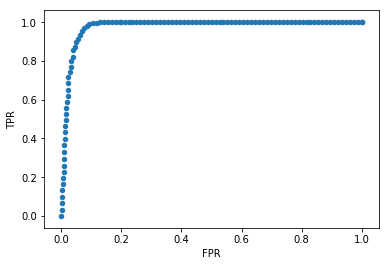

In [58]:
import pandas
import matplotlib.pyplot as plt
plt.figure();
trainingSummary.roc.toPandas().plot.scatter('FPR','TPR')



In [39]:
sc.stop()